## Project #3:

* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 06/09/2021 @ 12:45 PT
* Instructor name: Abhineet Kulkarni 
* Blog post URL:


# Tanzanian Water Well Classification

## The Business Problem

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


## Obtain data

Let's first import the data and take a look at the info to see if we need to do some data cleaning.

In [2]:
df = pd.read_csv('training_set_values.csv')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Scrubbing the data
### Cleaning based on info
Key observations from here:

**1. Dealing with missing values:**
- funder  = 3635
- installer = 3655  
- subvillage  = 371
- public_meeting = 3334
- scheme_managment = 3877
- scheme_name = 28166
- permit = 3056

**2. Dealing with date_recorded data type.**

**3. Dealing with outliers.**

#### Dealing with the missing values.

In [5]:
df.funder.value_counts(normalize=True)

Government Of Tanzania    0.162898
Danida                    0.055841
Hesawa                    0.039487
Rwssp                     0.024639
World Bank                0.024191
                            ...   
Marafin                   0.000018
Swifti                    0.000018
Swalehe Rajab             0.000018
Rudep/norad               0.000018
Isf / Tasaff              0.000018
Name: funder, Length: 1897, dtype: float64

Since for this project we would be more concerned about the functionality of the wells more than where the fund originally came from, the 'funder' column is not necessary for our analysis and hence I choose to drop it. Same goes for 'installer'

In [6]:
df.drop(columns=['funder', 'installer', 'scheme_name', 'permit', 'subvillage', 'public_meeting'], axis=1, inplace = True)

**Scheme managment**

In [7]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

We might need this feature as it might give a better glance at which organization is responsible for the managment of a water well project scheme.

#### Dealing with date_recorded data type

In [8]:
df['year'] = pd.to_datetime(df['date_recorded']).dt.year

In [9]:
df.year.value_counts(normalize=True)

2011    0.482727
2013    0.408603
2012    0.108148
2004    0.000505
2002    0.000017
Name: year, dtype: float64

In [10]:
df['month'] = pd.to_datetime(df['date_recorded']).dt.month

In [11]:
df.month.value_counts(normalize=True)

3     0.301953
2     0.208788
7     0.116633
1     0.106970
10    0.092020
4     0.066835
8     0.056633
11    0.022710
12    0.010455
6     0.005825
5     0.005657
9     0.005522
Name: month, dtype: float64

Tanzania has a rainy/wet season from December to May and a dry season from July to October. But as seen from the data not all the wells recieve their water source from rainfall so the season may not be of importance to us but we will keep the year of record. 

In [12]:
df.drop(columns=['date_recorded', 'month'], axis=1, inplace = True)

In [13]:
df.year.dtype

dtype('int64')

Ok it looks good so far.

### Dealing with outliers

Lets take a look at the location of those wells on the map and explore for any misplaced data or anything that looks weird.

C:\Users\milen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


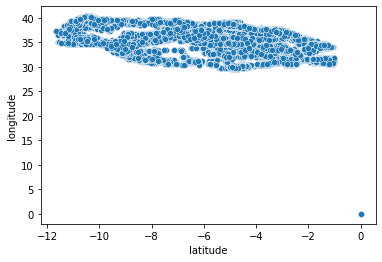

In [14]:
sns.scatterplot('latitude', 'longitude', data=df);

looking at the scatter plot of the locational coordinates, we notice an outlier with a 0' 0' latitude and longitude which really doesn't make sense since these points are far off the Tanzania. In this next step lets see how many of our data have these coordinates and drop them accordingly.

In [15]:
test = df.loc[df['longitude']==0, 'latitude'].value_counts()
test

-2.000000e-08    1812
Name: latitude, dtype: int64

In [16]:
to_drop = df.loc[(df['longitude']==0) & (df['latitude'] == -2.000000e-08)]
to_drop

,id,amount_tsh,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year
21,6091,0.0,0,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Shinyanga,17,...,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,2013
53,32376,0.0,0,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Mwanza,19,...,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2011
168,72678,0.0,0,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Shinyanga,17,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013
177,56725,0.0,0,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Shinyanga,17,...,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,2013
253,13042,0.0,0,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Mwanza,19,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,0,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Shinyanga,17,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011
59208,3631,0.0,0,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Shinyanga,17,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2013
59295,60843,0.0,0,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Shinyanga,17,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011
59324,748,0.0,0,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Shinyanga,17,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2013


In [17]:
df.drop(to_drop.index, axis=0, inplace=True)

C:\Users\milen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


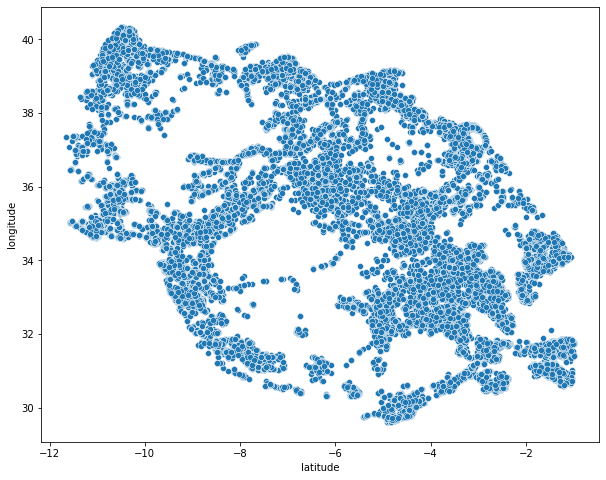

In [18]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot('latitude', 'longitude', data=df);

Now this looks much better.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   gps_height             57588 non-null  int64  
 3   longitude              57588 non-null  float64
 4   latitude               57588 non-null  float64
 5   wpt_name               57588 non-null  object 
 6   num_private            57588 non-null  int64  
 7   basin                  57588 non-null  object 
 8   region                 57588 non-null  object 
 9   region_code            57588 non-null  int64  
 10  district_code          57588 non-null  int64  
 11  lga                    57588 non-null  object 
 12  ward                   57588 non-null  object 
 13  population             57588 non-null  int64  
 14  recorded_by            57588 non-null  object 
 15  sc

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(53838, 34)

## Explore

Now that our data is clean we will move on to the next step and merge the two tables to their corresponding id inorder to label them according to their functionality.

In [22]:
df1 = pd.read_csv('training_set_labels.csv')
df1

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [23]:
df2 = pd.merge(df, df1, how = 'inner', left_on = ['id'], right_on = ['id'])
df2.shape

(53838, 35)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

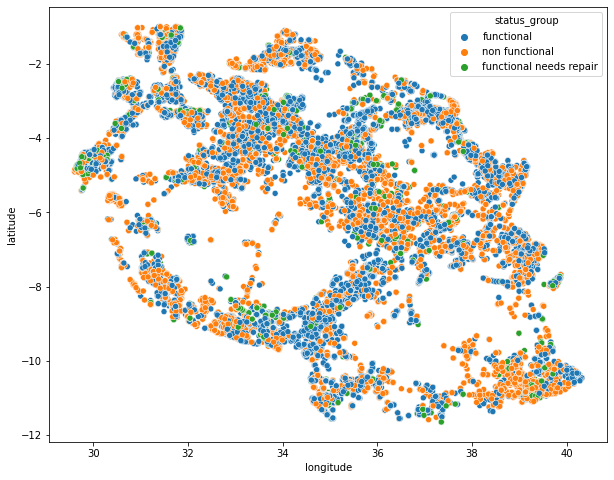

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "longitude", y = "latitude", hue = "status_group", data = df2)

In [25]:
df2.status_group.value_counts()

functional                 29543
non functional             20561
functional needs repair     3734
Name: status_group, dtype: int64

<AxesSubplot:xlabel='gps_height', ylabel='status_group'>

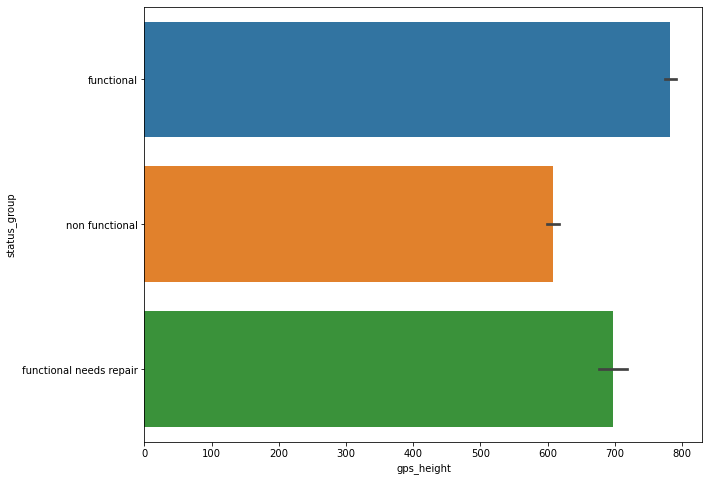

In [26]:
plt.figure(figsize=(10, 8))
sns.barplot(x = "gps_height", y = "status_group", data = df2)

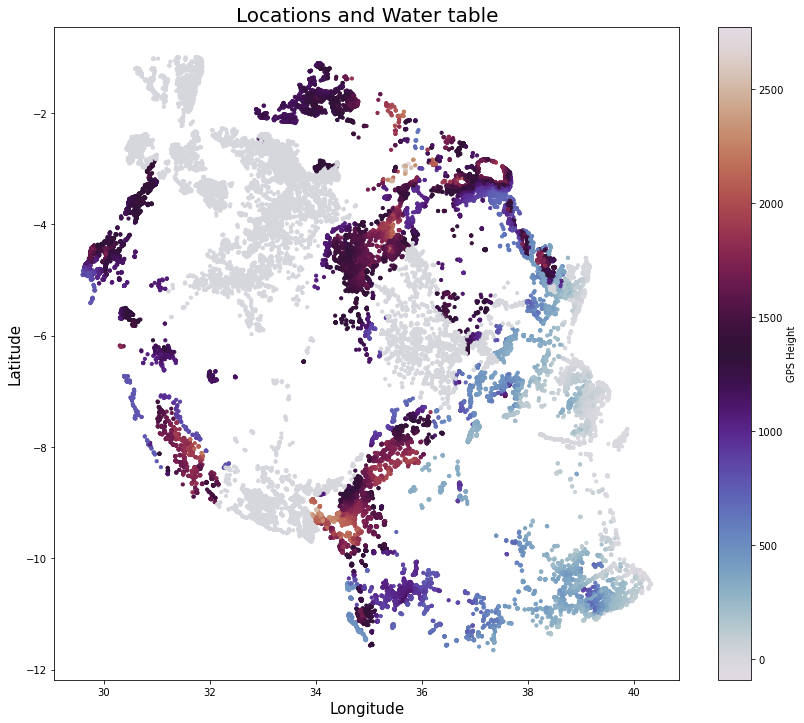

In [28]:
plt.figure(figsize=(14,12))
plt.scatter(x='longitude', y='latitude', c='gps_height' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('GPS Height')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Locations and Water table', fontsize=20)

plt.show()


In [40]:
quantity_df = df2.groupby('quantity')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'dry'),
  Text(1, 0, 'enough'),
  Text(2, 0, 'insufficient'),
  Text(3, 0, 'seasonal'),
  Text(4, 0, 'unknown')])

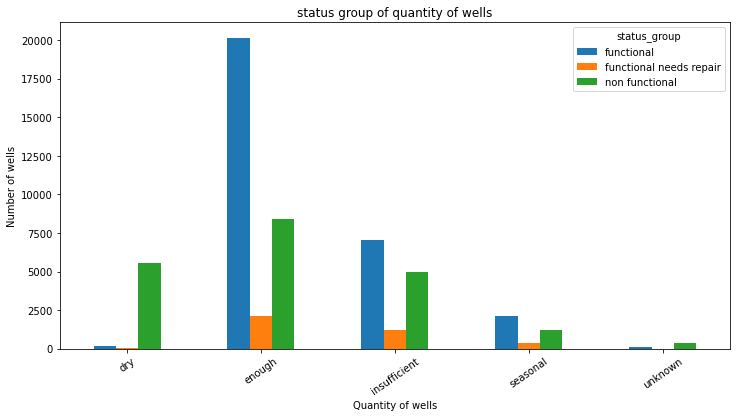

In [41]:
quantity_df.plot.bar(figsize = (12, 6))
plt.title('status group of quantity of wells')
plt.xlabel('Quantity of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 35)

In [42]:
quantity_df = df2.groupby('water_quality')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'coloured'),
  Text(1, 0, 'fluoride'),
  Text(2, 0, 'fluoride abandoned'),
  Text(3, 0, 'milky'),
  Text(4, 0, 'salty'),
  Text(5, 0, 'salty abandoned'),
  Text(6, 0, 'soft'),
  Text(7, 0, 'unknown')])

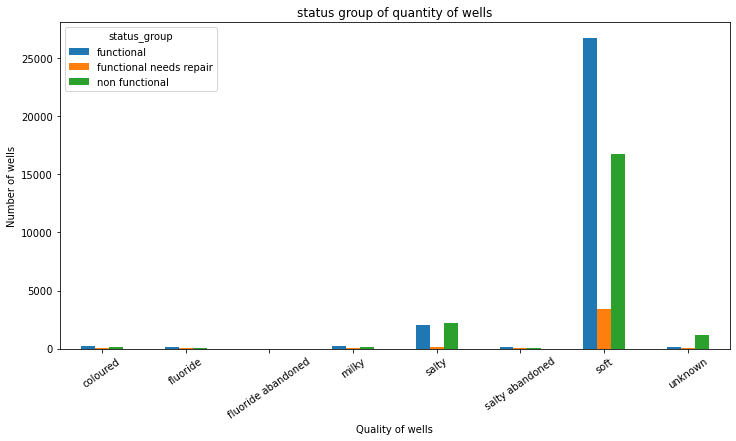

In [44]:
quantity_df.plot.bar(figsize = (12, 6))
plt.title('status group of quantity of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 35)

In [50]:
quantity_df = df2.groupby('extraction_type_class')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'gravity'),
  Text(1, 0, 'handpump'),
  Text(2, 0, 'motorpump'),
  Text(3, 0, 'other'),
  Text(4, 0, 'rope pump'),
  Text(5, 0, 'submersible'),
  Text(6, 0, 'wind-powered')])

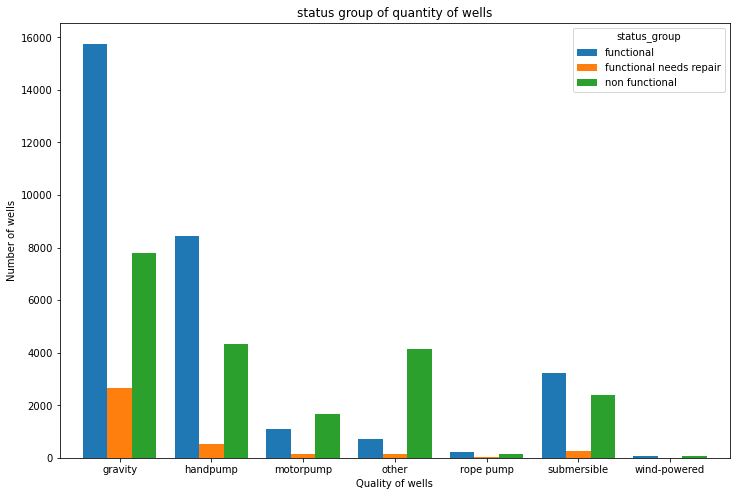

In [58]:
quantity_df.plot.bar(figsize = (12, 8), width=0.8)
plt.title('status group of quantity of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 0)

Text(0.5, 0, 'Number of wells')

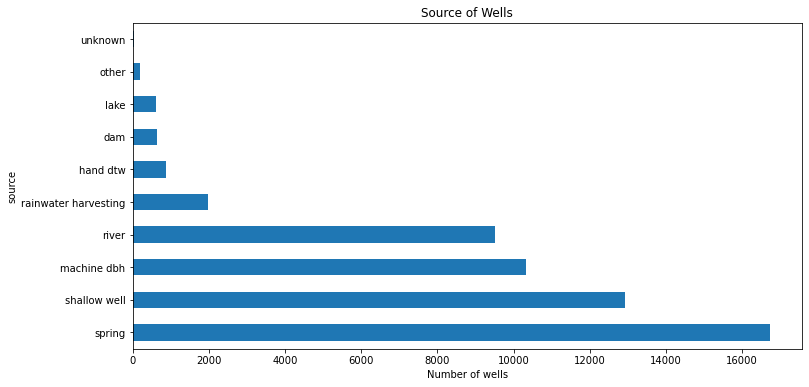

In [59]:
df2.source.value_counts().plot.barh(figsize = (12, 6))
plt.title('Source of Wells')
plt.ylabel('source')
plt.xlabel('Number of wells')